# Genetische Algoritmen

Dit notitieboek maakt deel uit van [AI for Beginners Curriculum](http://github.com/microsoft/ai-for-beginners).


In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
import math
import time

## Enige Theorie

**Genetische algoritmen** (GA) zijn gebaseerd op een **evolutionaire benadering** van AI, waarbij methoden van populatie-evolutie worden gebruikt om een optimale oplossing voor een gegeven probleem te vinden. Ze werden voorgesteld in 1975 door [John Henry Holland](https://en.wikipedia.org/wiki/John_Henry_Holland).

Genetische algoritmen zijn gebaseerd op de volgende ideeën:
* Geldige oplossingen voor het probleem kunnen worden weergegeven als **genen**.
* **Crossover** stelt ons in staat om twee oplossingen te combineren om een nieuwe geldige oplossing te verkrijgen.
* **Selectie** wordt gebruikt om meer optimale oplossingen te kiezen met behulp van een **fitnessfunctie**.
* **Mutaties** worden geïntroduceerd om de optimalisatie te destabiliseren en ons uit het lokale minimum te halen.

Als je een genetisch algoritme wilt implementeren, heb je het volgende nodig:

 * Een methode vinden om onze probleemoplossingen te coderen met behulp van **genen** $g\in\Gamma$.
 * Op de set genen $\Gamma$ moeten we een **fitnessfunctie** definiëren $\mathrm{fit}: \Gamma\to\mathbb{R}$. Kleinere functiewaarden komen overeen met betere oplossingen.
 * Een **crossover**-mechanisme definiëren om twee genen samen te voegen en een nieuwe geldige oplossing te verkrijgen $\mathrm{crossover}: \Gamma^2\to\Gamma$.
 * Een **mutatie**-mechanisme definiëren $\mathrm{mutate}: \Gamma\to\Gamma$.
In veel gevallen zijn crossover en mutatie vrij eenvoudige algoritmen om genen te manipuleren als numerieke reeksen of bitvectoren.

De specifieke implementatie van een genetisch algoritme kan variëren van geval tot geval, maar de algemene structuur is als volgt:

1. Selecteer een initiële populatie $G\subset\Gamma$.
2. Selecteer willekeurig een van de operaties die in deze stap zullen worden uitgevoerd: crossover of mutatie.
3. **Crossover**:
  * Selecteer willekeurig twee genen $g_1, g_2 \in G$.
  * Bereken de crossover $g=\mathrm{crossover}(g_1,g_2)$.
  * Als $\mathrm{fit}(g)<\mathrm{fit}(g_1)$ of $\mathrm{fit}(g)<\mathrm{fit}(g_2)$ - vervang het overeenkomstige gen in de populatie door $g$.
4. **Mutatie** - selecteer een willekeurig gen $g\in G$ en vervang het door $\mathrm{mutate}(g)$.
5. Herhaal vanaf stap 2, totdat we een voldoende kleine waarde van $\mathrm{fit}$ hebben bereikt, of totdat de limiet op het aantal stappen is bereikt.

Taken die typisch worden opgelost door GA:
1. Optimalisatie van planningen
1. Optimaal inpakken
1. Optimaal snijden
1. Versnellen van uitputtend zoeken


## Probleem 1: Eerlijke Verdeling van de Schat

**Opdracht**:  
Twee mensen hebben een schat gevonden die diamanten van verschillende groottes bevat (en, dienovereenkomstig, verschillende prijzen). Ze moeten de schat verdelen in twee delen op zo'n manier dat het verschil in prijs 0 is (of minimaal).

**Formele definitie**:  
We hebben een verzameling getallen $S$. We moeten deze verdelen in twee deelverzamelingen $S_1$ en $S_2$, zodat $$\left|\sum_{i\in S_1}i - \sum_{j\in S_2}j\right|\to\min$$ en $S_1\cup S_2=S$, $S_1\cap S_2=\emptyset$.

Laten we eerst de verzameling $S$ definiëren:


In [3]:
N = 200
S = np.array([random.randint(1,10000) for _ in range(N)])
print(S)

[8344 2197 9335 3131 5863 9429 3818 9791   15 5455 1396 9538 4872 6549
 8587 5986 6021 9764 8102 5083 5739 7684 8498 3007 6599  820 7490 2372
 9370 5235 3525 3154  859 1906 8159 3950 2173 2988 2050  349 8713 2284
 4177 6033 1651 9176 5049 8201  171 5081 1216 3756 4711 2757 7738 1272
 5650 6584 5395 9004 7797  969 8104 1283 1392 4001 5768  445  274  256
 8239 8015 4381 9021 1189 8879 1411 3539 6526 8011  136 7230 2332  451
 5702 2989 4320 2446 9578 8486 4027 2410 9588 8981 2177 1493 3232 9151
 4835 5594 6859 8394  369 3200  126 4259 2283 7755 2014 2458 8327 8082
 7413 7622 1206 5533 8751 3495 5868 8472 6850 3958 3149 4672 4810 6274
 4700 6134 4627 4616 6656 9949  884 2256 7419 1926 7973 5319 5967 9158
 3823 7697 9466 5675 5412 9784 5426 8209 3421 1136 6047 4429 8001 4417
 1381  722 7350 6018 6235 7860 5853 7660 5937 6242    1 9552 3971 8302
 2633 9227 7283  154 8599 4269 9392 8539 1630  368 2409 9351 3838 9814
 6186 5743 5083 1325 1610  779 3643 3262 5768 8725  961 4611 6310 4788
 1648 

Laten we elke mogelijke oplossing van het probleem coderen met een binaire vector $B\in\{0,1\}^N$, waarbij het getal op de $i$-de positie aangeeft tot welke van de verzamelingen ($S_1$ of $S_2$) het $i$-de getal in de oorspronkelijke verzameling $S$ behoort. De functie `generate` zal die willekeurige binaire vectoren genereren.


In [5]:
def generate(S):
    return np.array([random.randint(0,1) for _ in S])

b = generate(S)
print(b)

[1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 1
 0 1 1 1 0 1 0 0 1 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0
 1 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0]


Laten we nu de functie `fit` definiëren die de "kosten" van de oplossing berekent. Het zal het verschil zijn tussen de som van twee sets, $S_1$ en $S_2$:


In [6]:
def fit(B,S=S):
    c1 = (B*S).sum()
    c2 = ((1-B)*S).sum()
    return abs(c1-c2)

fit(b)

133784

Nu moeten we functies definiëren voor mutatie en crossover:
* Voor mutatie selecteren we één willekeurige bit en veranderen deze (van 0 naar 1 en omgekeerd).
* Voor crossover nemen we enkele bits van de ene vector en enkele bits van een andere. We gebruiken dezelfde `generate`-functie om willekeurig te bepalen welke bits we uit welke van de invoermaskers nemen.


In [7]:
def mutate(b):
    x = b.copy()
    i = random.randint(0,len(b)-1)
    x[i] = 1-x[i]
    return x

def xover(b1,b2):
    x = generate(b1)
    return b1*x+b2*(1-x)

Laten we een initiële populatie van de oplossingen $P$ creëren van de grootte `pop_size`:


In [8]:
pop_size = 30
P = [generate(S) for _ in range(pop_size)]

Nu, de hoofdfunctie om de evolutie uit te voeren. `n` is het aantal evolutiestappen dat moet worden doorlopen. Bij elke stap:
* Met een kans van 30% voeren we een mutatie uit en vervangen we het element met de slechtste `fit`-functie door het gemuteerde element
* Met een kans van 70% voeren we een crossover uit

De functie retourneert de beste oplossing (gen dat overeenkomt met de beste oplossing) en de geschiedenis van de minimale fit-functie in de populatie bij elke iteratie.


In [9]:
def evolve(P,S=S,n=2000):
    res = []
    for _ in range(n):
        f = min([fit(b) for b in P])
        res.append(f)
        if f==0:
            break
        if random.randint(1,10)<3:
            i = random.randint(0,len(P)-1)
            b = mutate(P[i])
            i = np.argmax([fit(z) for z in P])
            P[i] = b
        else:
            i = random.randint(0,len(P)-1)
            j = random.randint(0,len(P)-1)
            b = xover(P[i],P[j])
            if fit(b)<fit(P[i]):
                P[i]=b
            elif fit(b)<fit(P[j]):
                P[j]=b
            else:
                pass
    i = np.argmin([fit(b) for b in P])
    return (P[i],res)

(s,hist) = evolve(P)
print(s,fit(s))

[0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 0
 0 1 1 1 0 1 0 1 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1
 0 1 1 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0
 1 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 1
 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1] 4


Je kunt zien dat we erin geslaagd zijn om de `fit`-functie behoorlijk te minimaliseren! Hier is de grafiek die laat zien hoe de `fit`-functie voor de hele populatie zich gedraagt tijdens het proces.


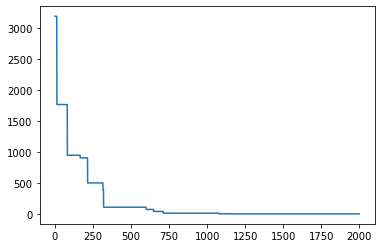

In [10]:
plt.plot(hist)
plt.show()

## Probleem 2: N-Damesprobleem

**Opdracht**:  
Je moet $N$ dames plaatsen op een schaakbord van de grootte $N\times N$ op zo'n manier dat ze elkaar niet aanvallen.

Laten we eerst het probleem oplossen zonder genetische algoritmen, door middel van volledige zoekruimte. We kunnen de toestand van het bord representeren door de lijst $L$, waarbij het $i$-de getal in de lijst de horizontale positie van de dame in de $i$-de rij is. Het is vrij duidelijk dat elke oplossing slechts één dame per rij zal hebben, en elke rij een dame zal bevatten.

Ons doel is om de eerste oplossing voor het probleem te vinden, waarna we stoppen met zoeken. Je kunt deze functie eenvoudig uitbreiden om alle mogelijke posities voor de dames te genereren.


In [11]:
N = 8

def checkbeats(i_new,j_new,l):
    for i,j in enumerate(l,start=1):
        if j==j_new:
            return False
        else:
            if abs(j-j_new) == i_new-i:
                return False
    return True

def nqueens(l,N=8,disp=True):
    if len(l)==N:
        if disp: print(l)
        return True
    else:
        for j in range(1,N+1):
            if checkbeats(len(l)+1,j,l):
                l.append(j)
                if nqueens(l,N,disp): return True
                else: l.pop()
        return False
            
nqueens([],8)


[1, 5, 8, 6, 3, 7, 2, 4]


True

Laten we nu meten hoe lang het duurt om een oplossing te vinden voor het 20-damesprobleem:


In [12]:
%timeit nqueens([],20,False)

10.6 s ± 2.17 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


Laten we hetzelfde probleem oplossen met behulp van een genetisch algoritme. Deze oplossing is geïnspireerd door [deze blogpost](https://kushalvyas.github.io/gen_8Q.html).

We zullen elke oplossing representeren door dezelfde lijst van lengte $N$, en als een `fit`-functie nemen we het aantal dames dat elkaar aanvalt:


In [13]:
def fit(L):
    x=0
    for i1,j1 in enumerate(L,1):
        for i2,j2 in enumerate(L,1):
            if i2>i1:
                if j2==j1 or (abs(j2-j1)==i2-i1): x+=1
    return x

Aangezien het berekenen van de fitnessfunctie tijdrovend is, laten we elke oplossing in de populatie opslaan samen met de waarde van de fitnessfunctie. Laten we de initiële populatie genereren:


In [14]:
def generate_one(N):
    x = np.arange(1,N+1)
    np.random.shuffle(x)
    return (x,fit(x))

def generate(N,NP):
    return [generate_one(N) for _ in range(NP)]

generate(8,5)

[(array([2, 3, 8, 7, 5, 4, 1, 6]), 4),
 (array([3, 4, 5, 1, 2, 8, 6, 7]), 8),
 (array([1, 3, 7, 4, 5, 8, 6, 2]), 6),
 (array([1, 5, 4, 6, 8, 3, 7, 2]), 4),
 (array([3, 5, 7, 1, 8, 6, 4, 2]), 3)]

Nu moeten we mutatie- en crossoverfuncties definiëren. Crossover zou twee genen samenvoegen door ze op een willekeurig punt te splitsen en twee delen van verschillende genen samen te voegen.


In [15]:
def mutate(G):
    x=random.randint(0,len(G)-1)
    G[x]=random.randint(1,len(G))
    return G
    
def xover(G1,G2):
    x=random.randint(0,len(G1))
    return np.concatenate((G1[:x],G2[x:]))

xover([1,2,3,4],[5,6,7,8])

array([1, 2, 7, 8])

In [17]:
def choose_rand(P):
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p = np.random.choice(len(P),2,False,p=w)
    return p[0],p[1]

def choose(P):
    def ch(w):
        p=[]
        while p==[]:
            r = random.random()
            p = [i for i,x in enumerate(P) if x[1]>=r]
        return random.choice(p)
    N=len(P[0][0])
    mf = N*(N-1)//2 # max fitness fn
    z = [mf-x[1] for x in P]
    tf = sum(z) # total fitness
    w = [x/tf for x in z]
    p1=p2=0
    while p1==p2:
        p1 = ch(w)
        p2 = ch(w)
    return p1,p2

Laten we de belangrijkste evolutionaire cyclus definiëren. We maken de logica iets anders dan in het vorige voorbeeld, om te laten zien dat je creatief kunt zijn. We blijven herhalen totdat we de perfecte oplossing hebben gevonden (fitnessfunctie=0), en bij elke stap nemen we de huidige generatie en produceren we een nieuwe generatie van dezelfde grootte. Dit wordt gedaan met de functie `nxgeneration`, volgens de volgende stappen:

1. Verwijder de minst geschikte oplossingen - er is een functie `discard_unfit` die dit doet
1. Voeg enkele willekeurige oplossingen toe aan de generatie
1. Vul een nieuwe generatie van grootte `gen_size` aan door de volgende stappen uit te voeren voor elk nieuw gen:
    - selecteer twee willekeurige genen, met een kans die evenredig is aan de fitnessfunctie
    - bereken een crossover
    - pas een mutatie toe met de kans `mutation_prob`


In [20]:
mutation_prob = 0.1

def discard_unfit(P):
    P.sort(key=lambda x:x[1])
    return P[:len(P)//3]

def nxgeneration(P):
    gen_size=len(P)
    P = discard_unfit(P)
    P.extend(generate(len(P[0][0]),3))
    new_gen = []
    for _ in range(gen_size):
        p1,p2 = choose_rand(P)
        n = xover(P[p1][0],P[p2][0])
        if random.random()<mutation_prob:
            n=mutate(n)
        nf = fit(n)
        new_gen.append((n,nf))
        '''
        if (nf<=P[p1][1]) or (nf<=P[p2][1]):
            new_gen.append((n,nf))
        elif (P[p1][1]<P[p2][1]):
            new_gen.append(P[p1])
        else:
            new_gen.append(P[p2])
        '''
    return new_gen
    
def genetic(N,pop_size=100):
    P = generate(N,pop_size)
    mf = min([x[1] for x in P])
    n=0
    while mf>0:
        #print("Generation {0}, fit={1}".format(n,mf))
        n+=1
        mf = min([x[1] for x in P])
        P = nxgeneration(P)
    mi = np.argmin([x[1] for x in P])
    return P[mi]

genetic(8)

(array([4, 7, 5, 3, 1, 6, 8, 2]), 0)

Het is interessant dat we meestal vrij snel een oplossing kunnen vinden, maar in enkele zeldzame gevallen bereikt optimalisatie een lokaal minimum en zit het proces lange tijd vast. Het is belangrijk om dat in overweging te nemen wanneer je de gemiddelde tijd meet: terwijl in de meeste gevallen het genetisch algoritme sneller zal zijn dan een volledige zoekopdracht, kan het in sommige gevallen langer duren. Om dit probleem te overwinnen, is het vaak zinvol om het aantal generaties dat in aanmerking wordt genomen te beperken, en als we niet in staat zijn de oplossing te vinden - kunnen we opnieuw beginnen.


In [19]:
%timeit genetic(10)

The slowest run took 18.71 times longer than the fastest. This could mean that an intermediate result is being cached.
26.4 s ± 28.7 s per loop (mean ± std. dev. of 7 runs, 1 loop each)



---

**Disclaimer**:  
Dit document is vertaald met behulp van de AI-vertalingsservice [Co-op Translator](https://github.com/Azure/co-op-translator). Hoewel we streven naar nauwkeurigheid, dient u zich ervan bewust te zijn dat geautomatiseerde vertalingen fouten of onnauwkeurigheden kunnen bevatten. Het originele document in zijn oorspronkelijke taal moet worden beschouwd als de gezaghebbende bron. Voor cruciale informatie wordt professionele menselijke vertaling aanbevolen. Wij zijn niet aansprakelijk voor eventuele misverstanden of verkeerde interpretaties die voortvloeien uit het gebruik van deze vertaling.
